##### 次世代の学習支援システムはどのように進化するべきか，教育や学習活動におけるAIと人間の役割についてどう考えるか．自分の意見をまとめてください． 

教育の効率化に大きく貢献している知的学習支援システムの未来について、2つ考えました。

1つ目は、没入型学習です。一人一台スマホなどのデバイスを持っている時代だからこそ、文字としての情報だけではなく、XRやデータを活用して、学習者が体験的に学ぶことができ流ようになると考えました。
2つ目は、人間とAIの共創です。AIが学習者に合わせて、学習の個別化や効率化をして、サポートするだけにとどまらず、教師や他の学習者と協力して新しいアイデアを生み出す環境を作れると思います。

進化している一方で、プライバシーやバイアスといった倫理的課題があることも学びました。AI技術に頼り切ってしまうのではなく、学習をサポートしてくれるパートナーとして位置付けることができればいいと思いました。

In [8]:
# 必要なライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 可視化のスタイル設定
sns.set(style="whitegrid")


In [12]:
# CSVデータの読み込み
file_path = "/Users/sakatakotomi/school/Lecture1/Lecture1-3/dsprog2/hitohito/LMS-Data.csv"  # CSVファイルのパス
df = pd.read_csv(file_path)

# データの最初の数行を確認
print(df.head())

# データの基本情報を確認
print(df.info())

# 各カラムのユニークな値を確認（カテゴリ変数の把握）
print(df.nunique())


  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Go

In [13]:
# 欠損値の確認
print(df.isnull().sum())

# 必要に応じて欠損値を補完（今回は欠損値がない場合を想定）
# カテゴリ変数のエンコーディング（文字データを数値データに変換）
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
                       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# データの統計量を確認
print(df.describe())


gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64
           gender  NationalITy  PlaceofBirth     StageID     GradeID  \
count  480.000000   480.000000    480.000000  480.000000  480.000000   
mean     0.635417     4.345833      4.397917    1.345833    2.906250   
std      0.481815     2.469265      2.628334    0.603732    2.464267   
min      0.000000     0.000000      0.000000    0.000000    0.000000   
25%      0.000000     3.000000      3.000000    1.000000    0.000000   
50%      1.000000     4.000000      4.000000 

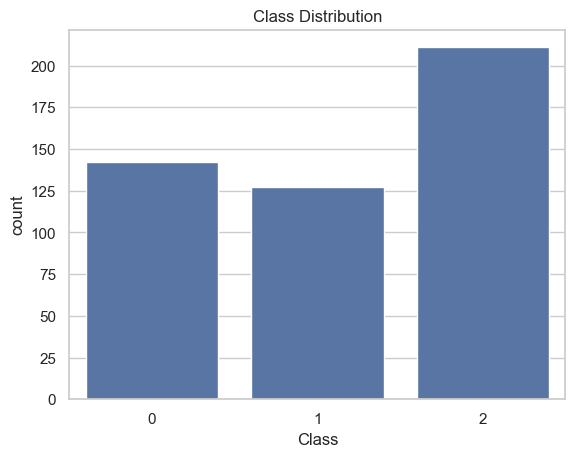

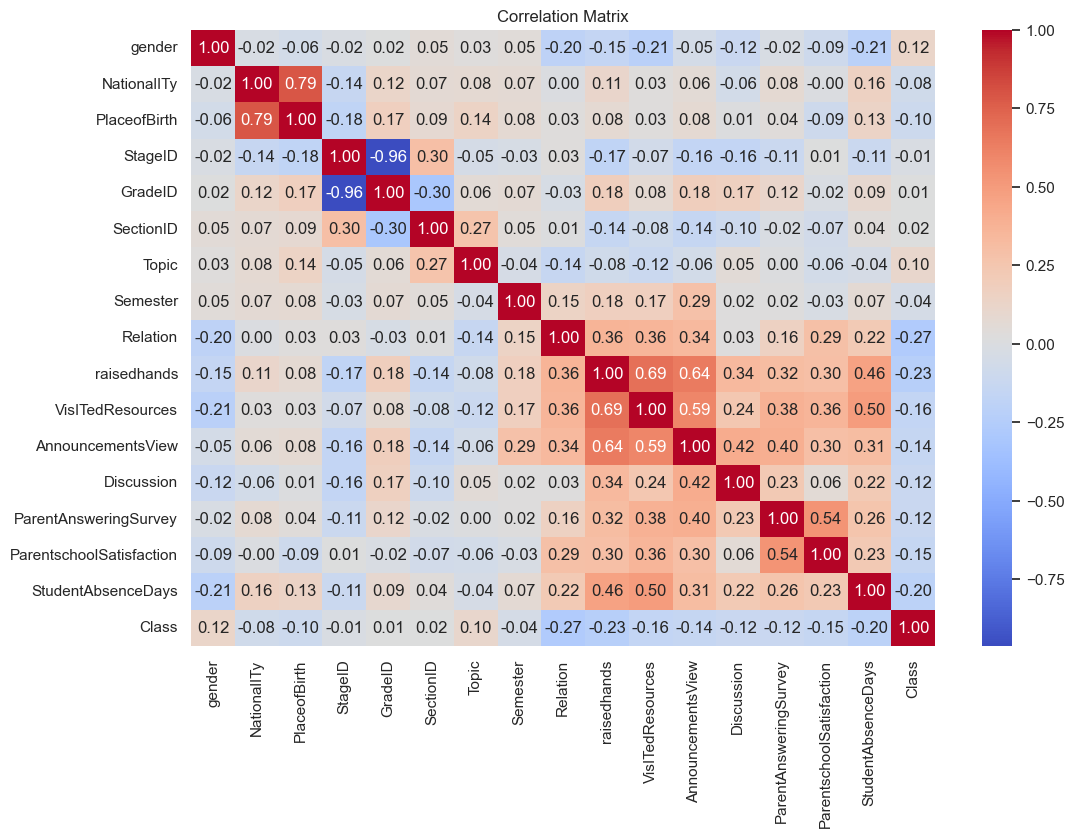

In [14]:
# 各クラスの分布を確認
sns.countplot(data=df, x="Class")
plt.title("Class Distribution")
plt.show()

# 数値データ同士の相関をヒートマップで表示
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [15]:
# 特徴量とターゲット変数の分割
X = df.drop(columns=["Class"])  # 特徴量
y = df["Class"]  # ターゲット（目標変数）

# データの分割（訓練データ80%、テストデータ20%）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの構築と訓練
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# テストデータでの予測
y_pred = model.predict(X_test)

# モデル評価
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[17  0  5]
 [ 0 25  1]
 [ 5  3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.89      0.96      0.93        26
           2       0.87      0.83      0.85        48

    accuracy                           0.85        96
   macro avg       0.85      0.86      0.85        96
weighted avg       0.85      0.85      0.85        96



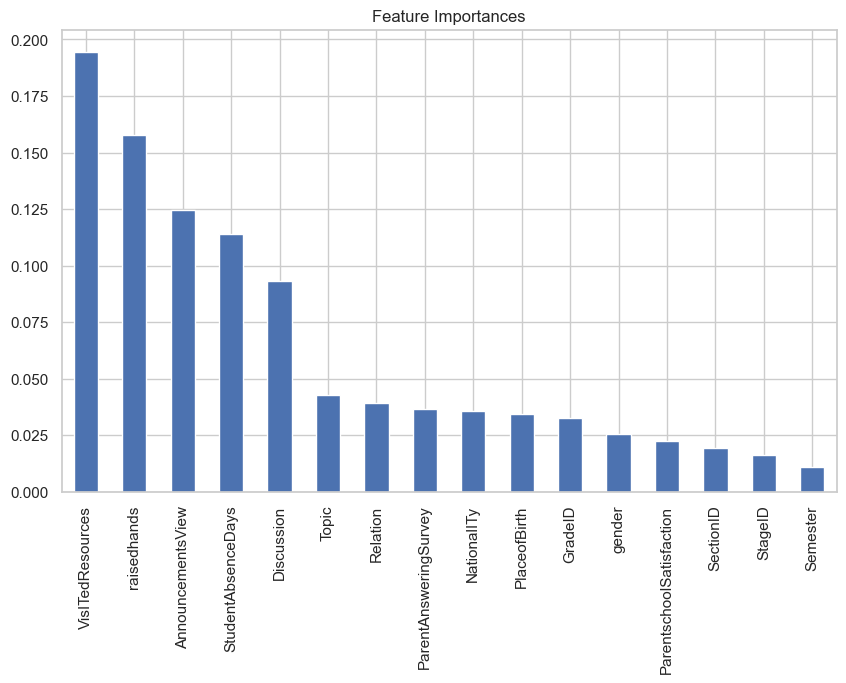

In [16]:
# 特徴量の重要度を可視化
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Feature Importances")
plt.show()


In [17]:
# 混同行列を数値で出力
from sklearn.metrics import ConfusionMatrixDisplay

# 混同行列の数値出力
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix 数値出力:")
print(conf_matrix)

# 特徴量の重要度を数値で表示
print("\nFeature Importances 数値出力:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Confusion Matrix 数値出力:
[[17  0  5]
 [ 0 25  1]
 [ 5  3 40]]

Feature Importances 数値出力:
gender: 0.0254
NationalITy: 0.0359
PlaceofBirth: 0.0344
StageID: 0.0162
GradeID: 0.0327
SectionID: 0.0193
Topic: 0.0428
Semester: 0.0111
Relation: 0.0393
raisedhands: 0.1576
VisITedResources: 0.1945
AnnouncementsView: 0.1245
Discussion: 0.0933
ParentAnsweringSurvey: 0.0365
ParentschoolSatisfaction: 0.0225
StudentAbsenceDays: 0.1139


分析結果

クラス3の誤分類が多く見られました。分類精度はおおむね良好でしたが、クラス3の精度向上が課題です。

成績に影響を与える主な要素は以下のとおりでした。
学習リソースの利用（VisITedResources）
授業中の挙手（raisedhands）
通知の閲覧（AnnouncementsView）
欠席日数（StudentAbsenceDays）

改善するためにできそうなこと
学習リソースの活用促進
オンライン教材や参考資料を充実させ、生徒が活用しやすい環境を整えること。
授業参加の促進
授業内の発言やディスカッションを増やし、生徒が積極的に参加できるようサポートすること。
掲示物・通知の強化
重要な情報を分かりやすく発信し、生徒に確認を促す工夫を行うこと。
欠席対策
欠席の多い生徒には学習支援や補講を行い、欠席日数の削減を目指すこと。

まとめ
学習リソースの活用や授業参加が成績向上に大きく影響していることが分かりました。これらの施策を実行し、生徒一人ひとりが学習しやすい環境を作ることで、全体の学習成果の向上が期待できると考えられます。